In [90]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
from tools import get_fault_tensor
from tools import get_fault_matmul_first_tensor, get_fault_matmul_second_tensor

In [91]:
def plot_tensor(tensor: torch.tensor):
    tensor = tensor.float().flatten().cpu().numpy()
    # Рисуем гистограмму
    plt.hist(tensor, bins=50, edgecolor='black')
    plt.title("Histogram")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_two_tensors(first_tensor: torch.tensor, first_tensor_name: str, second_tensor: torch.tensor, second_tensor_name: str):
    first_tensor = first_tensor.float().flatten().cpu().numpy()
    second_tensor = second_tensor.float().flatten().cpu().numpy()
    plt.figure(figsize=(8, 5))
    plt.hist(first_tensor, bins=50, alpha=0.3, label=first_tensor_name, color='blue')
    plt.hist(second_tensor, bins=50, alpha=0.3, label=second_tensor_name, color='red')
    plt.legend()
    plt.title("Histogram: {} vs {}".format(first_tensor_name, second_tensor_name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# Paramters of the test ...
def set_seed(seed: int = 42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # если используешь GPU
    torch.cuda.manual_seed_all(seed)  # если у тебя несколько GPU
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# set_seed(seed=5) # for torch.float
# set_seed(seed=5) # for torch.float16
set_seed(seed=50) # for torch.bfloat16
m, n, k = 8, 1024, 256
dtype = torch.bfloat16
coeff = 1e-5
bit = 3

[INFO] Bitflip: original=-16.875, flipped=-3.112888062438487e+20


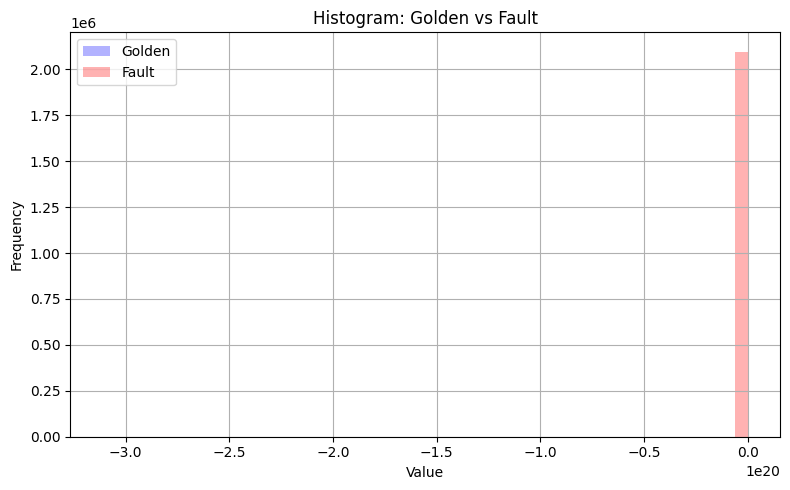

In [93]:
# Part of fault tensor analisys ...
# source_tensor = (torch.randn(m, n, k) * coeff).to(dtype)
source_tensor = (torch.randn(m, n, k) * coeff).abs().log2().to(dtype)

golden, fault_tensor = get_fault_tensor(source_tensor, bit)
plot_two_tensors(golden, "Golden", fault_tensor, "Fault")

[INFO] Bitflip: original=-16.5, flipped=-3.043712772162076e+20


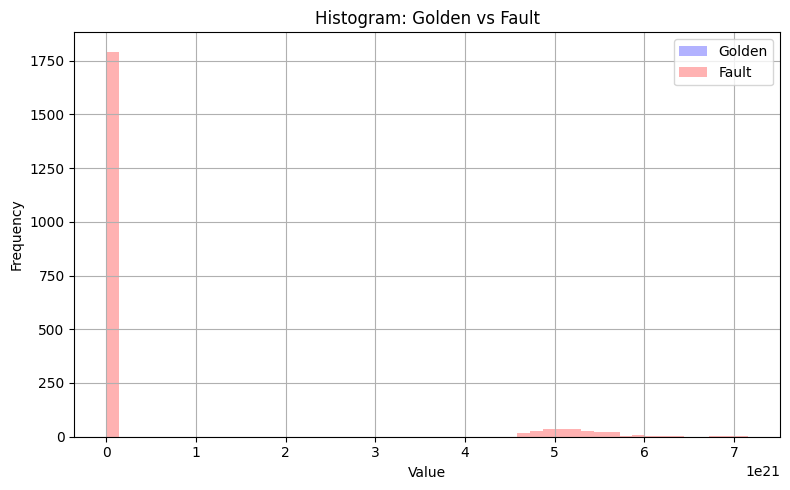

In [94]:
# Part of matmul fault analisys (first tensor) ...
# first_tensor = (torch.randn(m, n) * coeff).to(dtype)
# second_tensor = (torch.randn(n, k) * coeff).to(dtype)

first_tensor = (torch.randn(m, n) * coeff).abs().log2().to(dtype)
second_tensor = (torch.randn(n, k) * coeff).abs().log2().to(dtype)

golden, fault_tensor = get_fault_matmul_first_tensor(first_tensor, second_tensor, bit)
plot_two_tensors(golden, "Golden", fault_tensor, "Fault")

[INFO] Bitflip: original=-18.5, flipped=-3.412647653636267e+20


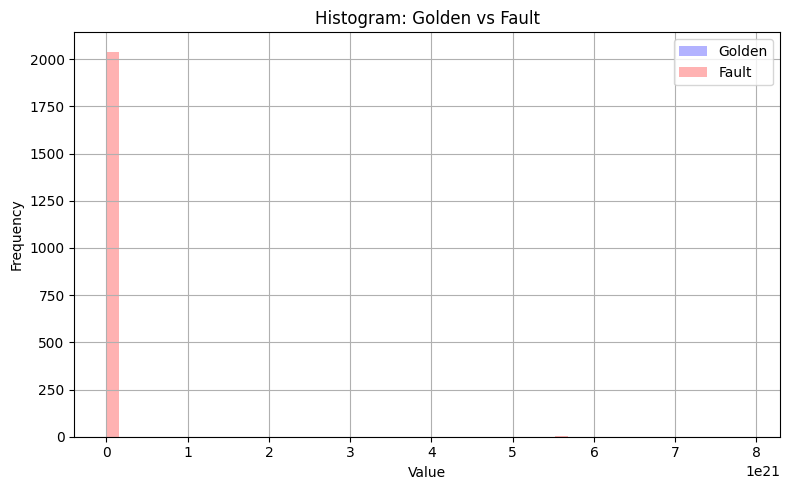

In [95]:
# Part of matmul fault analisys (second tensor) ...
# first_tensor = (torch.randn(m, n) * coeff).to(dtype)
# second_tensor = (torch.randn(n, k) * coeff).to(dtype)

first_tensor = (torch.randn(m, n) * coeff).abs().log2().to(dtype)
second_tensor = (torch.randn(n, k) * coeff).abs().log2().to(dtype)

golden, fault_tensor = get_fault_matmul_second_tensor(first_tensor, second_tensor, bit)
plot_two_tensors(golden, "Golden", fault_tensor, "Fault")